<a href="https://colab.research.google.com/github/AnovaYoung/IoT_PhysicalTherapy/blob/main/CNNforIoT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
import os

zip_file_path = '/Users/anovayoungers/Downloads/physical+therapy+exercises+dataset.zip'

extraction_directory = '/Users/anovayoungers/Downloads/physical_therapy_dataset'

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

print(f'Files extracted to {extraction_directory}')


Files extracted to /Users/anovayoungers/Downloads/physical_therapy_dataset


In [ ]:
for root, dirs, files in os.walk(extraction_directory, topdown=True):
    for name in files:
        print(os.path.join(root, name))
    for name in dirs:
        print(os.path.join(root, name))


/Users/anovayoungers/Downloads/physical_therapy_dataset/.DS_Store
/Users/anovayoungers/Downloads/physical_therapy_dataset/Description.pdf
/Users/anovayoungers/Downloads/physical_therapy_dataset/s5
/Users/anovayoungers/Downloads/physical_therapy_dataset/s2
/Users/anovayoungers/Downloads/physical_therapy_dataset/s3
/Users/anovayoungers/Downloads/physical_therapy_dataset/s4
/Users/anovayoungers/Downloads/physical_therapy_dataset/s1
/Users/anovayoungers/Downloads/physical_therapy_dataset/s5/e5
/Users/anovayoungers/Downloads/physical_therapy_dataset/s5/e2
/Users/anovayoungers/Downloads/physical_therapy_dataset/s5/e3
/Users/anovayoungers/Downloads/physical_therapy_dataset/s5/e4
/Users/anovayoungers/Downloads/physical_therapy_dataset/s5/e1
/Users/anovayoungers/Downloads/physical_therapy_dataset/s5/e6
/Users/anovayoungers/Downloads/physical_therapy_dataset/s5/e8
/Users/anovayoungers/Downloads/physical_therapy_dataset/s5/e7
/Users/anovayoungers/Downloads/physical_therapy_dataset/s5/e5/template_

In [ ]:
import pandas as pd

def load_data(file_path):
    """Load data from a specified file path into a pandas DataFrame."""
    try:
        data = pd.read_csv(file_path, sep="\t", header=None)
        return data
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None


In [ ]:
file_path = '/Users/anovayoungers/Downloads/physical_therapy_dataset/s1/e1/u1/test.txt'
data = load_data(file_path)
print(data.head())

                                                   0
0  time index;acc_x;acc_y;acc_z;gyr_x;gyr_y;gyr_z...
1  1;-9.685645;-1.645149;0.505022;-0.020696;0.009...
2  2;-9.648184;-1.645353;0.513125;-0.008165;-0.00...
3  3;-9.70057;-1.615223;0.512321;-0.004447;0.0110...
4  4;-9.685627;-1.630183;0.497591;-0.02611;0.0091...


In [ ]:
import os
import pandas as pd

def load_data_from_directory(directory_path):
    sensor_data = []
    session_metadata = []
    times_metadata = []

    for root, dirs, files in os.walk(directory_path, topdown=True):
        parts = root.split(os.sep)
        subject = next((part for part in parts if part.startswith('s')), None)
        exercise = next((part for part in parts if part.startswith('e')), None)
        sensor_unit = next((part for part in parts if part.startswith('u')), None)

        for name in files:
            file_path = os.path.join(root, name)
            if name == 'test.txt':  # Load sensor data
                data = pd.read_csv(file_path, sep=";", header=0)
                data['subject'] = subject
                data['exercise'] = exercise
                data['sensor_unit'] = sensor_unit
                sensor_data.append(data)
            elif name == 'template_session.txt': # Load session data
                session_data = pd.read_csv(file_path, sep=";", header=0)
                session_data['subject'] = subject
                session_data['exercise'] = exercise
                session_data['sensor_unit'] = sensor_unit
                session_metadata.append(session_data)
            elif name == 'template_times.txt':  # Load times data
                times_data = pd.read_csv(file_path, sep=";", header=0)
                times_data['subject'] = subject
                times_data['exercise'] = exercise

                times_metadata.append(times_data)

    # Combine all data into DataFrames
    sensor_df = pd.concat(sensor_data, ignore_index=True)
    session_df = pd.concat(session_metadata, ignore_index=True)
    times_df = pd.concat(times_metadata, ignore_index=True)

    return sensor_df, session_df, times_df

extraction_directory = '/Users/anovayoungers/Downloads/physical_therapy_dataset'
sensor_df, session_df, times_df = load_data_from_directory(extraction_directory)

print(sensor_df.head())
print(session_df.head())
print(times_df.head())



   time index     acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z  \
0           1  1.141452  9.587617  1.343498 -0.070101  0.005029 -0.011399   
1           2  1.164059  9.602035  1.463472 -0.034009  0.010527 -0.011461   
2           3  1.164136  9.639337  1.478518  0.002012 -0.015333 -0.011723   
3           4  1.194045  9.661973  1.374475  0.020135 -0.000033 -0.011679   
4           5  1.178997  9.647259  1.329349  0.025554  0.001804 -0.010769   

      mag_x     mag_y     mag_z subject exercise sensor_unit  
0 -0.445307 -0.798925 -0.107220      s5       e5          u1  
1 -0.446360 -0.797980 -0.108362      s5       e5          u1  
2 -0.445484 -0.798622 -0.111318      s5       e5          u1  
3 -0.444755 -0.797540 -0.110497      s5       e5          u1  
4 -0.444055 -0.797550 -0.108431      s5       e5          u1  
   time index     acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z  \
0           1  0.652541  9.682474 -1.445645 -0.009881  0.000176 -0.007806   
1    

Standardize the sensor data (features) to have a mean of 0 and a standard deviation of 1.

In [ ]:
print(sensor_df.columns)

Index(['time index', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z',
       'mag_x', 'mag_y', 'mag_z', 'subject', 'exercise', 'sensor_unit'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

sensor_columns = ['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x', 'mag_y', 'mag_z']

scaler = StandardScaler()

sensor_data_to_scale = sensor_df[sensor_columns]

sensor_df[sensor_columns] = scaler.fit_transform(sensor_data_to_scale)

Preprocessing for CNN's

Segmenting

In [ ]:
import numpy as np
segments = []  # To store sensor data segments
segment_labels = []

# Iterate through each unique subject, exercise, and sensor unit combination
for (subject, exercise, sensor_unit), sensor_df_subset in sensor_df.groupby(['subject', 'exercise', 'sensor_unit']):

    # Filter times_df for the current subject and exercise
    relevant_times = times_df[(times_df['subject'] == subject) & (times_df['exercise'] == exercise)]

    for _, time_row in relevant_times.iterrows():
        start, end = int(time_row['start']), int(time_row['end'])

        # Extracting segment based on start and end indices
        segment = sensor_df_subset[(sensor_df_subset['time index'] >= start) & (sensor_df_subset['time index'] <= end)]

        # Extract only sensor data for the segment
        segment_sensor_only = segment[['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x', 'mag_y', 'mag_z']].values

        segments.append(segment_sensor_only)
        segment_labels.append(exercise)  # Label is exercise type

# Convert to numpy arrays
segments = np.array(segments, dtype=object) # dtype=object allows for arrays of different lengths
segment_labels = np.array(segment_labels)

print(f"Total segments: {len(segments)}")


Total segments: 600


Label Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

# To convert segment labels from categorical to integers
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
segment_labels_encoded = label_encoder.fit_transform(segment_labels)

# Now one-hot encode
segment_labels_one_hot = to_categorical(segment_labels_encoded)


Train, Test, Val, Split

Preserving Chronological Order: By setting shuffle=False

In [ ]:
from sklearn.model_selection import train_test_split

train_size = 0.6
val_size = 0.2

temp_size = 1 - train_size  # 0.4

val_proportion_of_temp = val_size / temp_size  # 0.2 / 0.4 = 0.5

# Split data into a train set and a temporary set (combining val and test)
X_train, X_temp, y_train, y_temp = train_test_split(segments, segment_labels_one_hot, train_size=train_size, shuffle=False)

# Now, split the temporary set into val and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=val_proportion_of_temp, shuffle=False)


CNN Model Architecture

In [ ]:
print("Current shape of X_train:", X_train.shape)

Current shape of X_train: (360,)


In [ ]:
print(type(X_train))
print(type(X_train[0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Print the shapes of the first few segments to understand their structure
for i in range(min(5, len(X_train))):  # Check up to the first 5 segments
    print(f"Segment {i} shape:", X_train[i].shape)

Segment 0 shape: (216, 9)
Segment 1 shape: (106, 9)
Segment 2 shape: (204, 9)
Segment 3 shape: (216, 9)
Segment 4 shape: (106, 9)


In [ ]:
print("X_train overall shape:", X_train.shape)

X_train overall shape: (360,)


It's clear that X_train is a 1D numpy array of objects (in this case, 2D numpy arrays) where each object represents a segment with a shape (segment_length, 9). The segment lengths vary. Since X_train has an overall shape of (360,), it means I have 360 such segments that are not uniformly sized for direct input into a Conv1D layer of a CNN, which requires a 3D numpy array of shape (num_samples, window_size, num_features).

I need to pad these segments to a uniform length before proceeding.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

window_size = max([segment.shape[0] for segment in X_train])

# Pad each segment to the window_size
X_train_padded = pad_sequences([segment for segment in X_train], maxlen=window_size, dtype='float32', padding='post', truncating='post', value=0.0)

print("New shape of X_train:", X_train_padded.shape)


New shape of X_train: (360, 218, 9)


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_val_padded = pad_sequences(X_val, maxlen=window_size, dtype='float32', padding='post', truncating='post', value=0.0)
X_test_padded = pad_sequences(X_test, maxlen=window_size, dtype='float32', padding='post', truncating='post', value=0.0)

print("New shape of X_val_padded:", X_val_padded.shape)
print("New shape of X_test_padded:", X_test_padded.shape)


New shape of X_val_padded: (120, 218, 9)
New shape of X_test_padded: (120, 218, 9)


In [ ]:
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

y_train shape: (360, 8)
y_val shape: (120, 8)
y_test shape: (120, 8)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(218, 9)),  # Adjusted to match X_train_padded shape
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')  # Output layer with one neuron per class
])

model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 216, 64)           1792      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 108, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 106, 128)          24704     
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 53, 128)           0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6784)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

**Run the Model**

In [ ]:
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32,
                    validation_data=(X_val_padded, y_val))


Epoch 1/10
12/12 [==============================] - 0s 12ms/step - loss: 2.0660 - accuracy: 0.2000 - val_loss: 1.7912 - val_accuracy: 0.3333
Epoch 2/10
12/12 [==============================] - 0s 6ms/step - loss: 1.4668 - accuracy: 0.4833 - val_loss: 1.5511 - val_accuracy: 0.4000
Epoch 3/10
12/12 [==============================] - 0s 6ms/step - loss: 1.1249 - accuracy: 0.6000 - val_loss: 1.3877 - val_accuracy: 0.4500
Epoch 4/10
12/12 [==============================] - 0s 6ms/step - loss: 0.8384 - accuracy: 0.7167 - val_loss: 1.3367 - val_accuracy: 0.4583
Epoch 5/10
12/12 [==============================] - 0s 6ms/step - loss: 0.7279 - accuracy: 0.7639 - val_loss: 1.3330 - val_accuracy: 0.5167
Epoch 6/10
12/12 [==============================] - 0s 6ms/step - loss: 0.6180 - accuracy: 0.7667 - val_loss: 1.4375 - val_accuracy: 0.4500
Epoch 7/10
12/12 [==============================] - 0s 6ms/step - loss: 0.4870 - accuracy: 0.8250 - val_loss: 1.4902 - val_accuracy: 0.4667
Epoch 8/10
12/12 [=

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


4/4 [==============================] - 0s 2ms/step - loss: 1.9541 - accuracy: 0.5333
Test Loss: 1.9541223049163818, Test Accuracy: 0.5333333611488342


Visualization

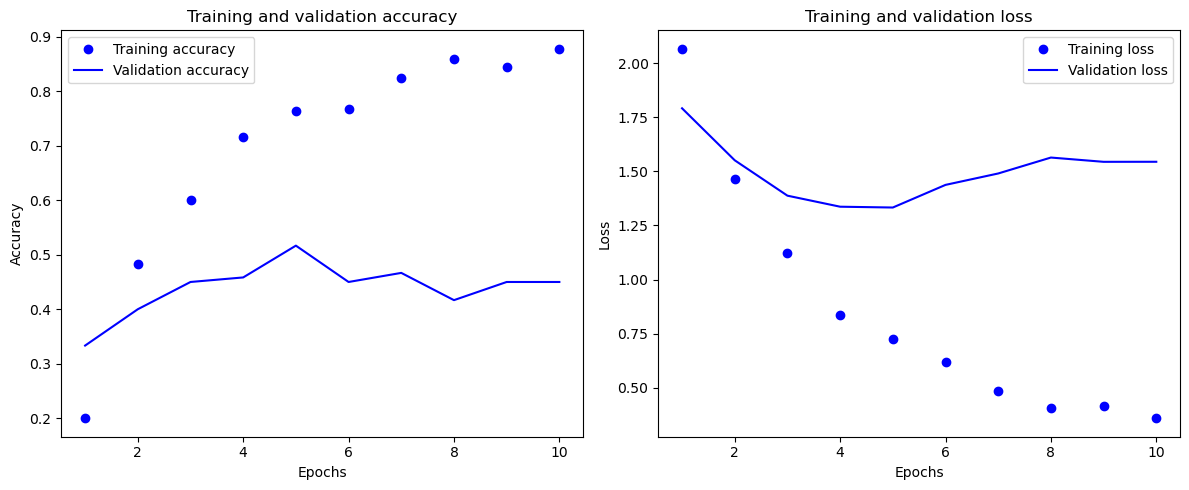

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


**Model Summary**

The training accuracy improved significantly over epochs, reaching approximately 87.78%.

The validation accuracy reached a peak around 51.67%, indicating the model's generalization performance on unseen data during the training process. Not very good. very close to outright guessing.

After training, I evaluated the model on the test set, achieving a test accuracy of approximately 53.33%. This gives a baseline performance of the model on completely unseen data.